# Why is mobile internet so expensive in African countries?

* average price per continent (bars, median)
* price range in African countries (lollipop, median price)
* development of prices on continents over time (line, over time)
* development of prices in African countries over time (slope, 5 or 10 years)

**Source:** https://www.cable.co.uk/mobiles/worldwide-data-pricing/

*Data from 5,554 mobile data plans in 228 countries were gathered and analysed by Cable.co.uk between 3 February and 25 February 2020. The average cost of one gigabyte (1GB) was then calculated and compared to form a worldwide mobile data pricing league table.*

**Methodology:** https://s3-eu-west-1.amazonaws.com/assets.cable.co.uk/mobile-data-cost/global-broadband-pricing-study-2020-methodology.pdf

* "Plans measured": *Researchers first established the mobile data providers in each country before selecting one SIM plan from each data amount they offer. A country with eight providers, for example, each offering three different SIM data sizes, will have 24 plans recorded (...) Packages were recorded up to a maximum of 60 per country – records beyond this number have negligible impact on the average (...) This number will always be between 3 and 60.*
* "Average price":  *Averages are calculated as the MEDIAN of all recorded package prices/data limits. (...)  The average monthly cost of 1GB of data for each country as a whole is calculated as the MEDIAN of every plan recorded*
* "Sample date" / Price data : *The 'Sample date' column is very important as it represents the day the data was collected for that particular country. It is a snapshot. Prices change all the time and therefore may be different by the time you go about viewing and/or utilising our data* 

Excluded countries:

| Name | Continental region | Missing data reason |
|-----------|---------------|---------------------|
|Eritrea | NORTHERN AFRICA | NO PROVIDERS |
|Congo (Democratic Republic of) | SUB-SAHARAN AFRICA | PRICES ONLY IN 'UNITS' |
|Zimbabwe | SUB-SAHARAN AFRICA | UNRELIABLE EXCHANGE RATES |
|South Sudan | SUB-SAHARAN AFRICA | NO PROVIDERS |
|North Korea | ASIA | NO PROVIDERS |
|St. Pierre and Miquelon | CARIBBEAN | NO PROVIDERS |
|Christmas Island | CARIBBEAN | NO PROVIDERS |
|Venezuela | SOUTH AMERICA | NO PROVIDERS |
|Wallis and Futuna | OCEANIA | NO PROVIDERS |
|Marshall Islands | OCEANIA | NO PROVIDERS |
|Cook Islands | OCEANIA | NO PROVIDERS |
|Tuvalu | OCEANIA | NO PROVIDERS |

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import altair as alt
from vega_datasets import data

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [2]:
df = pd.read_excel('data/CableUK-global-mobile-data-price-comparison-2020.xlsx')
df.head()

,Rank,Country code,Name,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 27/04/2020),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB for 30 days (USD),Most expensive 1GB (Local currency),Most expensive 1GB (USD),Sample date
0,1,IN,India,ASIA (EX. NEAR EAST),60,6.656667,INR,0.013131,0.087409,1.625000,0.021338,209.090909,2.745598,2020-02-14
1,2,IL,Israel,NEAR EAST,17,0.399000,ILS,0.284986,0.113710,0.226667,0.064597,1.326667,0.378082,2020-02-14
2,3,KG,Kyrgyzstan,CIS (FORMER USSR),15,16.666667,KGS,0.012441,0.207352,7.666667,0.095382,46.428571,0.577624,2020-02-17
3,4,IT,Italy,WESTERN EUROPE,42,0.399583,EUR,1.084990,0.433544,0.080000,0.086799,6.990000,7.584080,2020-02-14
4,5,UA,Ukraine,CIS (FORMER USSR),12,12.500000,UAH,0.036976,0.462196,6.666667,0.246505,40.000000,1.479028,2020-02-24


In [3]:
df.columns

Index(['Rank', 'Country code', 'Name', 'Continental region', 'Plans measured',
       'Average price of 1GB (local currency)', 'Currency',
       'Conversion rate (USD) (Frozen 27/04/2020)',
       'Average price of 1GB (USD)', 'Cheapest 1GB (Local currency)',
       'Cheapest 1GB for 30 days (USD)', 'Most expensive 1GB (Local currency)',
       'Most expensive 1GB (USD)', 'Sample date'],
      dtype='object')

In [4]:
df.describe()

,Rank,Plans measured,Average price of 1GB (local currency),Conversion rate (USD) (Frozen 27/04/2020),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB for 30 days (USD),Most expensive 1GB (Local currency),Most expensive 1GB (USD)
count,228.00000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,114.50000,24.359649,1585.529624,0.463989,5.091619,454.290798,2.032339,8187.038920,33.135952
std,65.96211,14.391399,5394.879827,0.534800,6.653127,2047.367868,4.599013,33111.512935,82.331805
min,1.00000,1.000000,0.240000,0.000024,0.087409,0.025000,0.014187,0.999500,0.378082
25%,57.75000,14.000000,3.875417,0.009334,1.383334,1.112500,0.328057,23.997500,6.795012
50%,114.50000,21.000000,18.750000,0.234689,3.241225,5.205000,0.851860,83.397059,14.082885
75%,171.25000,32.000000,199.333333,1.000000,5.332174,58.056875,1.850105,1333.666667,33.249032
max,228.00000,60.000000,37037.037037,3.220710,52.495333,22222.222222,51.424000,300000.000000,1140.070302


In [5]:
df[df['Plans measured']<14]

,Rank,Country code,Name,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 27/04/2020),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB for 30 days (USD),Most expensive 1GB (Local currency),Most expensive 1GB (USD),Sample date
4,5,UA,Ukraine,CIS (FORMER USSR),12,12.500000,UAH,0.036976,0.462196,6.666667,0.246505,40.000000,1.479028,2020-02-24
21,22,RE,Réunion,SUB-SAHARAN AFRICA,9,0.666500,EUR,1.084990,0.723146,0.199800,0.216781,99.900000,108.390501,2020-02-20
23,24,DO,Dominican Republic,CARIBBEAN,11,39.933333,DOP,0.018517,0.739447,14.392000,0.266497,331.666667,6.141482,2020-02-10
34,35,MC,Monaco,WESTERN EUROPE,3,0.899900,EUR,1.084990,0.976383,0.599800,0.650777,0.999500,1.084448,2020-02-18
38,39,RO,Romania,EASTERN EUROPE,11,0.950000,EUR,1.084990,1.030740,0.600000,0.650994,10.000000,10.849900,2020-02-20
43,44,YT,Mayotte,SUB-SAHARAN AFRICA,11,1.000000,EUR,1.084990,1.084990,0.500000,0.542495,20.000000,21.699800,2020-02-25
47,48,DJ,Djibouti,SUB-SAHARAN AFRICA,7,200.000000,DJF,0.005620,1.124000,83.333333,0.468333,5000.000000,28.100000,2020-02-10
49,50,SM,San Marino,WESTERN EUROPE,1,1.066667,EUR,1.084990,1.157323,1.066667,1.157323,1.066667,1.157323,2020-02-21
70,71,IM,Isle of Man,WESTERN EUROPE,13,1.333333,GBP,1.243310,1.657747,0.450000,0.559489,16.000000,19.892960,2020-02-14
75,76,LT,Lithuania,BALTICS,12,1.707500,EUR,1.084990,1.852620,0.478000,0.518625,9.900000,10.741401,2020-02-17


In [6]:
# calculate span cheapest/most expensive --> hint for competition? High price range, high competition?
df['price_range_USD'] = df['Most expensive 1GB (USD)'] - df['Cheapest 1GB for 30 days (USD)']

In [7]:
# merge with regions 
regions = pd.read_csv('data/country-and-continent-codes-list.csv', delimiter =';')
regions.head()

,continent,region,subregion,country,M49 code,ISO-alpha3 code,ISO-alpha2 code,Other groupings
0,Asia,Southern Asia,Southern Asia,Afghanistan,4.0,AFG,AF,LDC LLDC
1,Europe,Southern Europe,Southern Europe,Albania,8.0,ALB,AL,NaN
2,Americas,Northern America,Northern America,Antarctica,10.0,ATA,AQ,NaN
3,Africa,Northern Africa,Northern Africa,Algeria,12.0,DZA,DZ,NaN
4,Oceania,Polynesia,Polynesia,American Samoa,16.0,ASM,AS,SIDS


In [8]:
df_merged = df.merge(regions, left_on="Country code", right_on="ISO-alpha2 code")
df_merged.head()

,Rank,Country code,Name,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 27/04/2020),Average price of 1GB (USD),Cheapest 1GB (Local currency),...,Sample date,price_range_USD,continent,region,subregion,country,M49 code,ISO-alpha3 code,ISO-alpha2 code,Other groupings
0,1,IN,India,ASIA (EX. NEAR EAST),60,6.656667,INR,0.013131,0.087409,1.625000,...,2020-02-14,2.724260,Asia,Southern Asia,Southern Asia,India,356.0,IND,IN,NaN
1,2,IL,Israel,NEAR EAST,17,0.399000,ILS,0.284986,0.113710,0.226667,...,2020-02-14,0.313485,Asia,Western Asia,Western Asia,Israel,376.0,ISR,IL,NaN
2,3,KG,Kyrgyzstan,CIS (FORMER USSR),15,16.666667,KGS,0.012441,0.207352,7.666667,...,2020-02-17,0.482242,Asia,Central Asia,Central Asia,Kyrgyzstan,417.0,KGZ,KG,LLDC
3,4,IT,Italy,WESTERN EUROPE,42,0.399583,EUR,1.084990,0.433544,0.080000,...,2020-02-14,7.497281,Europe,Southern Europe,Southern Europe,Italy,380.0,ITA,IT,NaN
4,5,UA,Ukraine,CIS (FORMER USSR),12,12.500000,UAH,0.036976,0.462196,6.666667,...,2020-02-24,1.232524,Europe,Eastern Europe,Eastern Europe,Ukraine,804.0,UKR,UA,NaN


In [9]:
# merge with income groups
income_groups = pd.read_csv('data/WorldBank_Countries_IncomeGroups.csv', delimiter=';')
income_groups.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra


In [10]:
df_merged = df_merged.merge(income_groups, left_on='ISO-alpha3 code', right_on='Country Code')

In [11]:
#merge with GNI per capita

#Source: https://data.worldbank.org/indicator/NY.GNP.PCAP.CD
#Methodology: https://databank.worldbank.org/reports.aspx?source=2&type=metadata&series=NY.GNP.PCAP.CD
#Measure: GNI per capita, Atlas method (current US$)
gni_pc_USD = pd.read_csv('data/WorldBank-GNIperCapita-USD.csv')
gni_pc_USD = gni_pc_USD[['Country Name', 'Country Code','2019']]
gni_pc_USD.columns=(['country_name', 'country_code', 'gni_percap_cUSD'])
gni_pc_USD.head()

,country_name,country_code,gni_percap_cUSD
0,Aruba,ABW,NaN
1,Afghanistan,AFG,540.0
2,Angola,AGO,3050.0
3,Albania,ALB,5240.0
4,Andorra,AND,NaN


In [12]:
# calculating monthly income out of yearly gni
gni_pc_USD['monthly_gni_pc_USD'] = gni_pc_USD['gni_percap_cUSD'] / 12

In [13]:
df_merged = df_merged.merge(gni_pc_USD, left_on='ISO-alpha3 code', right_on='country_code')

In [14]:
df_merged = df_merged[['Rank', 'country', 'country_code','Plans measured',
       'Average price of 1GB (local currency)', 'Currency',
       'Conversion rate (USD) (Frozen 27/04/2020)',
       'Average price of 1GB (USD)', 'Cheapest 1GB (Local currency)',
       'Cheapest 1GB for 30 days (USD)', 'Most expensive 1GB (Local currency)',
       'Most expensive 1GB (USD)', 'Sample date', 'price_range_USD',
       'continent', 'region', 'subregion',  'M49 code', 'IncomeGroup', 'gni_percap_cUSD', 'monthly_gni_pc_USD']]

In [15]:
# enable compasion in relation to income
df_merged['Average price of 1GB as share of GNI per capita'] = df_merged['Average price of 1GB (USD)'] / df_merged ['monthly_gni_pc_USD'] * 100
df_merged.head()

,Rank,country,country_code,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 27/04/2020),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB for 30 days (USD),...,Sample date,price_range_USD,continent,region,subregion,M49 code,IncomeGroup,gni_percap_cUSD,monthly_gni_pc_USD,Average price of 1GB as share of GNI per capita
0,1,India,IND,60,6.656667,INR,0.013131,0.087409,1.625000,0.021338,...,2020-02-14,2.724260,Asia,Southern Asia,Southern Asia,356.0,Lower middle income,2130.0,177.500000,0.049245
1,2,Israel,ISR,17,0.399000,ILS,0.284986,0.113710,0.226667,0.064597,...,2020-02-14,0.313485,Asia,Western Asia,Western Asia,376.0,High income,43290.0,3607.500000,0.003152
2,3,Kyrgyzstan,KGZ,15,16.666667,KGS,0.012441,0.207352,7.666667,0.095382,...,2020-02-17,0.482242,Asia,Central Asia,Central Asia,417.0,Lower middle income,1240.0,103.333333,0.200664
3,4,Italy,ITA,42,0.399583,EUR,1.084990,0.433544,0.080000,0.086799,...,2020-02-14,7.497281,Europe,Southern Europe,Southern Europe,380.0,High income,34460.0,2871.666667,0.015097
4,5,Ukraine,UKR,12,12.500000,UAH,0.036976,0.462196,6.666667,0.246505,...,2020-02-24,1.232524,Europe,Eastern Europe,Eastern Europe,804.0,Lower middle income,3370.0,280.833333,0.164580


## Average price (median of medians) per continent

In [16]:
df_merged.groupby(by='continent')['Average price of 1GB (USD)'].median().sort_values()

continent
Asia        1.500000
Europe      2.105518
Africa      3.299028
Americas    4.767190
Oceania     4.808530
Name: Average price of 1GB (USD), dtype: float64

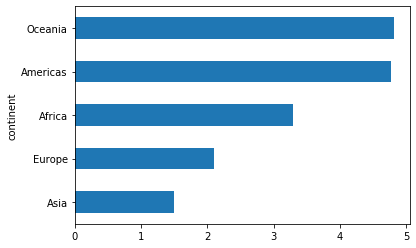

In [17]:
df_merged.groupby(by='continent')['Average price of 1GB (USD)'].median().sort_values().plot(kind='barh')
plt.savefig('charts/drafts/continents-price-usd.pdf', transparent = True)

In [18]:
df_merged.groupby(by='continent')['monthly_gni_pc_USD'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,49.0,225.000000,269.950591,23.333333,65.000000,120.833333,280.000000,1405.833333
Americas,34.0,1055.441176,1086.964026,65.833333,442.916667,717.500000,1327.083333,5480.000000
Asia,41.0,1182.093496,1468.510065,45.000000,177.500000,395.000000,1842.500000,5284.166667
Europe,38.0,2666.337719,1984.677638,280.833333,1100.000000,1929.166667,4109.583333,7125.000000
Oceania,9.0,1233.333333,1654.115291,170.833333,264.166667,348.333333,1185.833333,4575.833333


In [19]:
# should be price for Afrian continent:
120.833333 *0.02

2.41666666

In [20]:
df_merged.groupby(by='continent')['Average price of 1GB (USD)'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,50.0,5.674164,7.029652,0.500000,1.514770,3.299028,4.872664,28.262528
Americas,45.0,6.312279,5.613762,0.706623,2.744850,4.767190,9.111269,28.750000
Asia,49.0,2.842224,3.440758,0.087409,0.754440,1.500000,3.816667,15.977696
Europe,46.0,3.015266,2.590483,0.433544,1.186708,2.105518,3.928455,12.063280
Oceania,17.0,6.931078,7.270058,0.588254,2.500000,4.808530,8.530159,30.473828


In [21]:
# exclude Oceania, because for many GNI is missing
df_merged[df_merged['continent']=='Oceania']

,Rank,country,country_code,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 27/04/2020),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB for 30 days (USD),...,Sample date,price_range_USD,continent,region,subregion,M49 code,IncomeGroup,gni_percap_cUSD,monthly_gni_pc_USD,Average price of 1GB as share of GNI per capita
10,11,Fiji,FJI,21,1.330000,FJD,0.442296,0.588254,0.714286,0.315926,...,2020-02-11,4.092295,Oceania,Melanesia,Melanesia,242.0,Upper middle income,5860.0,488.333333,0.120462
15,16,Australia,AUS,46,1.050000,AUD,0.645860,0.678153,0.428571,0.276797,...,2020-02-04,6.181803,Oceania,Australia and New Zealand,Australia and New Zealand,36.0,High income,54910.0,4575.833333,0.014820
73,79,Guam,GUM,23,2.000000,USD,1.000000,2.000000,1.390000,1.390000,...,2020-02-12,58.610000,Oceania,Micronesia,Micronesia,316.0,High income,NaN,NaN,NaN
92,99,American Samoa,ASM,15,2.500000,USD,1.000000,2.500000,1.333333,1.333333,...,2020-02-04,3.666667,Oceania,Polynesia,Polynesia,16.0,Upper middle income,NaN,NaN,NaN
93,100,Palau,PLW,8,2.500000,USD,1.000000,2.500000,1.000000,1.000000,...,2020-02-20,1.500000,Oceania,Micronesia,Micronesia,585.0,High income,NaN,NaN,NaN
96,104,Northern Mariana Islands,MNP,21,2.650000,USD,1.000000,2.650000,1.390000,1.390000,...,2020-02-18,4.610000,Oceania,Micronesia,Micronesia,580.0,High income,NaN,NaN,NaN
116,125,Tonga,TON,12,7.913077,TOP,0.430450,3.406184,2.777778,1.195694,...,2020-02-24,7.018726,Oceania,Polynesia,Polynesia,776.0,Upper middle income,NaN,NaN,NaN
136,147,Vanuatu,VUT,19,500.000000,VUV,0.008490,4.245000,88.888889,0.754667,...,2020-02-25,9.150333,Oceania,Melanesia,Melanesia,548.0,Lower middle income,3170.0,264.166667,1.606940
149,161,New Caledonia,NCL,9,530.000000,XPF,0.009073,4.808530,215.000000,1.950630,...,2020-02-19,32.525621,Oceania,Melanesia,Melanesia,540.0,High income,NaN,NaN,NaN
161,173,Papua New Guinea,PNG,18,18.750000,PGK,0.288265,5.404967,5.000000,1.441324,...,2020-02-20,11.863209,Oceania,Melanesia,Melanesia,598.0,Lower middle income,2780.0,231.666667,2.333079


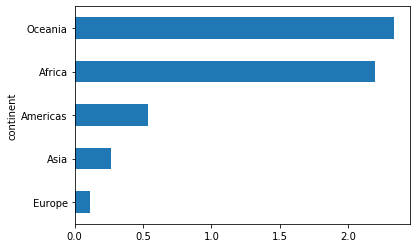

In [22]:
df_merged.groupby(by='continent')['Average price of 1GB as share of GNI per capita'].median().sort_values().plot(kind='barh')
plt.savefig('charts/drafts/continents-price-as-share.pdf', transparent = True)

In [23]:
df_merged.groupby(by='continent')['Average price of 1GB as share of GNI per capita'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,49.0,6.794508,13.877428,0.196253,0.819879,2.199352,6.724138,86.545768
Americas,34.0,0.691827,0.729455,0.056492,0.332544,0.536245,0.721966,4.155459
Asia,41.0,0.591512,0.994375,0.003152,0.111203,0.269055,0.587093,5.418889
Europe,38.0,0.184551,0.187723,0.015097,0.054944,0.108731,0.258026,0.712398
Oceania,9.0,2.076383,1.755921,0.014820,0.170496,2.333079,3.119078,4.993264


In [24]:
# share of countries per continent where it is affordable
continents = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

pricing_overview = []

for continent in continents:
    continent_dict = {}
    continent_dict['continent'] = continent
    df_continent = df_merged[df_merged['continent'] == continent]
    countries_count = len(df_continent)
    country_count_expensive = len(df_continent[df_continent['Average price of 1GB as share of GNI per capita']>2.0])
    country_count_affordable = len(df_continent[df_continent['Average price of 1GB as share of GNI per capita']<=2.0])
    continent_dict['countries_expensive'] = country_count_expensive
    continent_dict['countries_affordable'] = country_count_affordable
    continent_dict['total_countries_count'] = countries_count
    continent_dict['share_expensive'] = country_count_expensive / countries_count * 100
    continent_dict['share_affordable'] = country_count_affordable / countries_count * 100
    pricing_overview.append(continent_dict)

affordability_overview = pd.DataFrame(pricing_overview)
affordability_overview.head()

,continent,countries_affordable,countries_expensive,share_affordable,share_expensive,total_countries_count
0,Africa,21,28,42.000000,56.000000,50
1,Americas,33,1,73.333333,2.222222,45
2,Asia,39,2,79.591837,4.081633,49
3,Europe,38,0,82.608696,0.000000,46
4,Oceania,4,5,23.529412,29.411765,17


## Price ranges by continent

In [25]:
df_merged.groupby(by='continent')['price_range_USD'].median().sort_values()

continent
Asia         6.700751
Americas    12.387833
Africa      12.757037
Oceania     15.469389
Europe      17.322924
Name: price_range_USD, dtype: float64

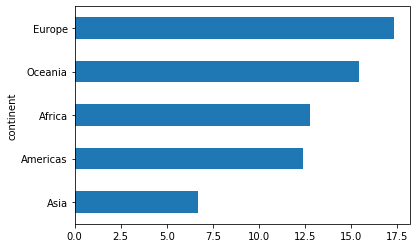

In [26]:
df_merged.groupby(by='continent')['price_range_USD'].median().sort_values().plot(kind='barh')

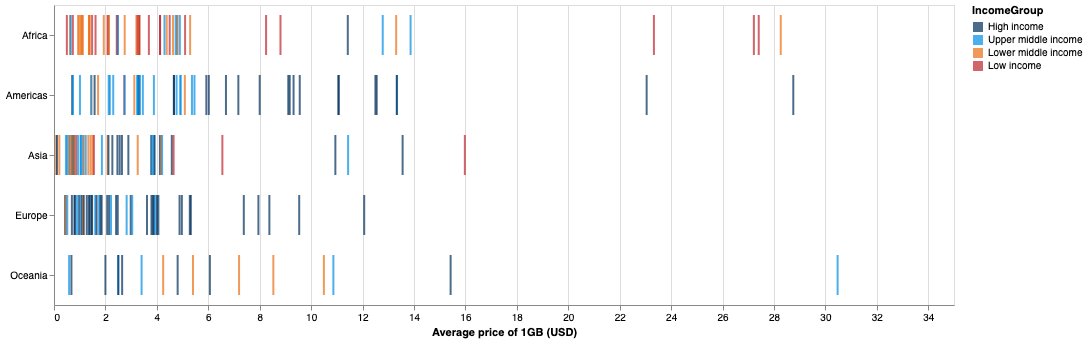

In [27]:
# strip plot average price
alt.Chart(df_merged).mark_tick(height=40, thickness=2).encode(
    alt.X('Average price of 1GB (USD):Q'),
    alt.Y('continent:N', title=''),
    tooltip=['country', 'Average price of 1GB (USD)'],
    color=alt.Color('IncomeGroup:N',scale=alt.Scale(domain=['High income', 'Upper middle income','Lower middle income','Low income'],range=["#002D5A","#008FE6","#EB6E14","#BE232D"]))
).interactive().properties(width=900, height=300)

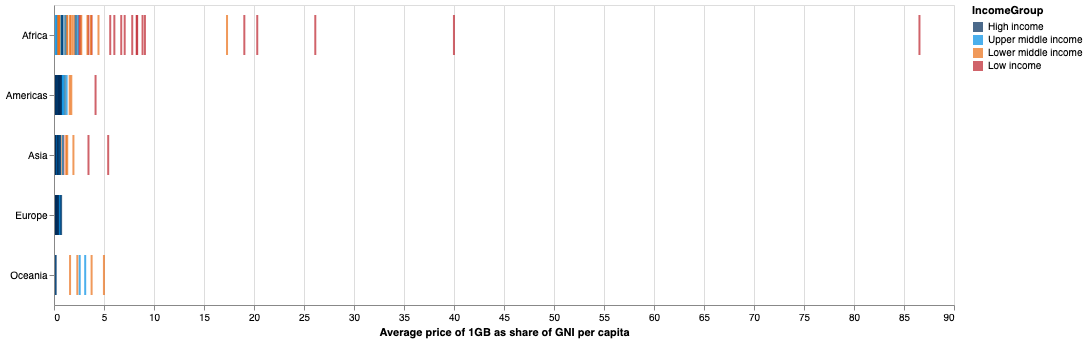

In [29]:
# strip plot average price
alt.Chart(df_merged).mark_tick(height=40, thickness=2).encode(
    alt.X('Average price of 1GB as share of GNI per capita:Q'),
    alt.Y('continent:N', title=''),
    tooltip=['country', 'Average price of 1GB as share of GNI per capita','Average price of 1GB (USD)'],
    color=alt.Color('IncomeGroup:N',scale=alt.Scale(domain=['High income', 'Upper middle income','Lower middle income','Low income'],range=["#002D5A","#008FE6","#EB6E14","#BE232D"]))
).interactive().properties(width=900, height=300)

# Focus on African countries

In [30]:
africa = df_merged[df_merged['continent']=='Africa']

In [31]:
africa.head()

,Rank,country,country_code,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 27/04/2020),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB for 30 days (USD),...,Sample date,price_range_USD,continent,region,subregion,M49 code,IncomeGroup,gni_percap_cUSD,monthly_gni_pc_USD,Average price of 1GB as share of GNI per capita
6,7,Somalia,SOM,25,0.500000,USD,1.000000,0.500000,0.181818,0.181818,...,2020-02-21,6.484848,Africa,Sub-Saharan Africa,Eastern Africa,706.0,Low income,NaN,NaN,NaN
12,13,Sudan,SDN,31,34.600000,SDG,0.018083,0.625678,14.000000,0.253165,...,2020-02-21,0.990958,Africa,Northern Africa,Northern Africa,729.0,Lower middle income,590.0,49.166667,1.272566
14,15,Algeria,DZA,19,83.333333,DZD,0.007791,0.649269,20.833333,0.162317,...,2020-02-11,3.733297,Africa,Northern Africa,Northern Africa,12.0,Upper middle income,3970.0,330.833333,0.196253
21,23,United Republic of Tanzania,TZA,60,1690.476190,TZS,0.000434,0.733197,681.818182,0.295720,...,2020-02-24,2.595760,Africa,Sub-Saharan Africa,Eastern Africa,834.0,Low income,1080.0,90.000000,0.814663
32,34,Ghana,GHA,35,5.400000,GHS,0.173568,0.937265,1.080000,0.187453,...,2020-02-25,8.490922,Africa,Sub-Saharan Africa,Western Africa,288.0,Lower middle income,2220.0,185.000000,0.506629


## Classification of countries, where it is too expensive 

In [32]:
list_country_dicts = []

for country in africa['country_code']:
    country_dict = {}
    country_dict['country_ISO'] = country
    country_df = africa[africa['country_code']==country]
    value = float(country_df['Average price of 1GB as share of GNI per capita'].to_string(index=False))
    country_dict['Av_price_pct_share_GNIpc'] = value
    if value <= 2.0:
        country_dict['price_category'] = 'affordable'
    elif 3.99 >= value >= 2.01:
        country_dict['price_category'] = 'costly'
    elif 15.99 >= value >= 4.0:
        country_dict['price_category'] = 'expensive'
    elif value >=16:
        country_dict['price_category'] = 'unaffordable'
    else:
        country_dict['price_category'] = 'youMISSEDsth'
    list_country_dicts.append(country_dict)
    
classification_africa_df = pd.DataFrame(list_country_dicts)

In [33]:
classification_africa_df.head()

,Av_price_pct_share_GNIpc,country_ISO,price_category
0,NaN,SOM,youMISSEDsth
1,1.272566,SDN,affordable
2,0.196253,DZA,affordable
3,0.814663,TZA,affordable
4,0.506629,GHA,affordable


In [34]:
classification_africa_df['price_category'].value_counts()

affordable      21
costly          12
expensive       10
unaffordable     6
youMISSEDsth     1
Name: price_category, dtype: int64

In [35]:
classification_africa_df[classification_africa_df['price_category']=='youMISSEDsth']

,Av_price_pct_share_GNIpc,country_ISO,price_category
0,NaN,SOM,youMISSEDsth


In [36]:
len(classification_africa_df)

50

In [37]:
regions.head()

,continent,region,subregion,country,M49 code,ISO-alpha3 code,ISO-alpha2 code,Other groupings
0,Asia,Southern Asia,Southern Asia,Afghanistan,4.0,AFG,AF,LDC LLDC
1,Europe,Southern Europe,Southern Europe,Albania,8.0,ALB,AL,NaN
2,Americas,Northern America,Northern America,Antarctica,10.0,ATA,AQ,NaN
3,Africa,Northern Africa,Northern Africa,Algeria,12.0,DZA,DZ,NaN
4,Oceania,Polynesia,Polynesia,American Samoa,16.0,ASM,AS,SIDS


In [38]:
# merge classification_africa_df with numeric ISO, check for same df length
classification_africa_df_regionalized = classification_africa_df.merge(regions, left_on='country_ISO', right_on = 'ISO-alpha3 code')
len(classification_africa_df_regionalized)

50

In [39]:
classification_africa_df_regionalized.head()

,Av_price_pct_share_GNIpc,country_ISO,price_category,continent,region,subregion,country,M49 code,ISO-alpha3 code,ISO-alpha2 code,Other groupings
0,NaN,SOM,youMISSEDsth,Africa,Sub-Saharan Africa,Eastern Africa,Somalia,706.0,SOM,SO,LDC
1,1.272566,SDN,affordable,Africa,Northern Africa,Northern Africa,Sudan,729.0,SDN,SD,LDC
2,0.196253,DZA,affordable,Africa,Northern Africa,Northern Africa,Algeria,12.0,DZA,DZ,NaN
3,0.814663,TZA,affordable,Africa,Sub-Saharan Africa,Eastern Africa,United Republic of Tanzania,834.0,TZA,TZ,LDC
4,0.506629,GHA,affordable,Africa,Sub-Saharan Africa,Western Africa,Ghana,288.0,GHA,GH,NaN


In [40]:
classification_africa_df_regionalized['price_category'].value_counts()

affordable      21
costly          12
expensive       10
unaffordable     6
youMISSEDsth     1
Name: price_category, dtype: int64

In [41]:
classification_africa_df_regionalized[(classification_africa_df_regionalized['price_category']!= 'affordable')&(classification_africa_df_regionalized['price_category']!= 'youMISSEDsth')]['Av_price_pct_share_GNIpc'].median()

5.829075

In [42]:
len(classification_africa_df_regionalized)

50

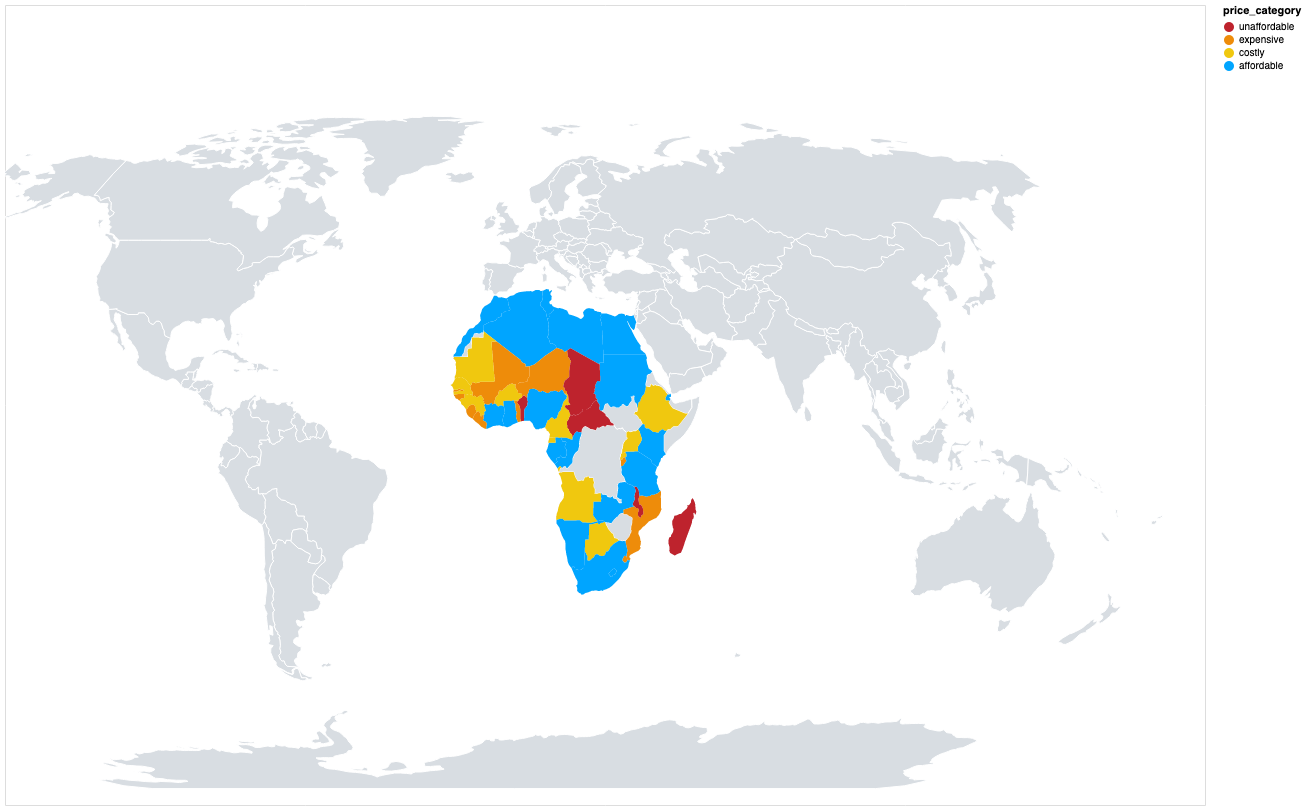

In [43]:
# make map

countries = alt.topo_feature(data.world_110m.url, "countries")

projection_type="naturalEarth1"
scale_value=240
center_values=[25,10]

base = alt.Chart(countries).mark_geoshape(
    fill='#D8DDE2',
    stroke='white'
).properties(
    width=1200,
    height=800,
).project(
    type=projection_type,
    center=center_values,
    scale=scale_value
)

variable_list = ['unaffordable', 'expensive', 'costly', 'affordable']
visualized_parameter = 'price_category'
tooltip=visualized_parameter+':N'

chart = alt.Chart(countries).mark_geoshape().encode(
    alt.Color(visualized_parameter, type ='ordinal', scale=alt.Scale(domain=variable_list,range=["#BE232D","#EE8C0A","#F0C80F","#00A5FF"])),
    tooltip=["country:N", tooltip]
).transform_lookup(
    lookup="id",
    from_=alt.LookupData(classification_africa_df_regionalized,'M49 code',['country', visualized_parameter])
).project(
    type=projection_type,
    center=center_values,
    scale=scale_value
).properties(
    width=1200,
    height=800,
    #title='Covid-19 new cases trend by country'
)

base + chart

## Generate overview what prices should be

In [174]:
# UN recommends 1gb should not be more expensive than 2% of monthly income
africa['should_be_price'] = africa['monthly_gni_pc_USD'] * 0.02

/Users/grueng/.virtualenvs/dw_data/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
# make handlebar for non-affordable: what price is, what it should be
too_expensive = africa[africa['should_be_price']<africa['Average price of 1GB (USD)']]
too_expensive.head()

,Rank,country,country_code,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 27/04/2020),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB for 30 days (USD),...,price_range_USD,continent,region,subregion,M49 code,IncomeGroup,gni_percap_cUSD,monthly_gni_pc_USD,Average price of 1GB as share of GNI per capita,should_be_price
59,64,Rwanda,RWA,32,1346.666667,RWF,0.001100,1.481333,315.789474,0.347368,...,6.097944,Africa,Sub-Saharan Africa,Eastern Africa,646.0,Low income,820.0,68.333333,2.167805,1.366667
65,70,Uganda,UGA,60,6125.000000,UGX,0.000264,1.615080,1666.666667,0.439478,...,20.655443,Africa,Sub-Saharan Africa,Eastern Africa,800.0,Low income,780.0,65.000000,2.484738,1.300000
75,81,Guinea,GIN,22,19833.333333,GNF,0.000105,2.082827,1466.666667,0.154024,...,3.276515,Africa,Sub-Saharan Africa,Western Africa,324.0,Low income,950.0,79.166667,2.630940,1.583333
78,84,Burundi,BDI,44,4000.000000,BIF,0.000530,2.121780,666.666667,0.353630,...,3.624708,Africa,Sub-Saharan Africa,Eastern Africa,108.0,Low income,280.0,23.333333,9.093343,0.466667
87,94,Ethiopia,ETH,8,81.250000,ETB,0.030039,2.440678,60.000000,1.802347,...,1.501956,Africa,Sub-Saharan Africa,Eastern Africa,231.0,Low income,850.0,70.833333,3.445664,1.416667


In [48]:
too_expensive['IncomeGroup'].value_counts()

Low income             19
Lower middle income     7
Upper middle income     2
Name: IncomeGroup, dtype: int64

In [49]:
too_expensive[too_expensive['IncomeGroup'] == 'Upper middle income']

,Rank,country,country_code,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 27/04/2020),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB for 30 days (USD),...,price_range_USD,continent,region,subregion,M49 code,IncomeGroup,gni_percap_cUSD,monthly_gni_pc_USD,Average price of 1GB as share of GNI per capita,should_be_price
192,210,Equatorial Guinea,GNQ,4,7750.0,XAF,0.001650,12.783734,6000.0,9.897084,...,8.247570,Africa,Sub-Saharan Africa,Middle Africa,226.0,Upper middle income,6460.0,538.333333,2.374687,10.766667
197,215,Botswana,BWA,13,169.5,BWP,0.081813,13.867311,110.0,8.999435,...,23.725782,Africa,Sub-Saharan Africa,Southern Africa,72.0,Upper middle income,7660.0,638.333333,2.172425,12.766667


In [50]:
too_expensive_reduced = too_expensive[['country', 'Average price of 1GB (USD)', 'should_be_price']]

In [51]:
too_expensive_reduced_melted = too_expensive_reduced.melt(id_vars=['country'], var_name='price_segment', value_name='price_USD')
too_expensive_reduced_melted.head()

,country,price_segment,price_USD
0,Rwanda,Average price of 1GB (USD),1.481333
1,Uganda,Average price of 1GB (USD),1.615080
2,Guinea,Average price of 1GB (USD),2.082827
3,Burundi,Average price of 1GB (USD),2.121780
4,Ethiopia,Average price of 1GB (USD),2.440678


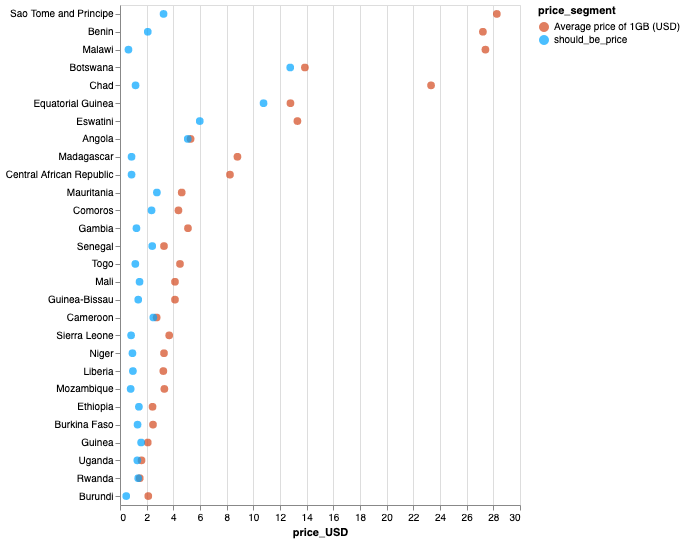

In [52]:
alt.Chart(too_expensive_reduced_melted).mark_circle(size=60).encode(
    alt.X('price_USD'),
    alt.Y('country:N', title='', sort={"encoding": "x", "order": "descending"}),
    #tooltip=['country', 'Average price of 1GB (USD)'],
    color=alt.Color('price_segment:N',scale=alt.Scale(domain=['Average price of 1GB (USD)', 'should_be_price'],range=["#D44820", "#00A5FF"]))
).interactive().properties(width=400, height=500)

## Cluster by income groups

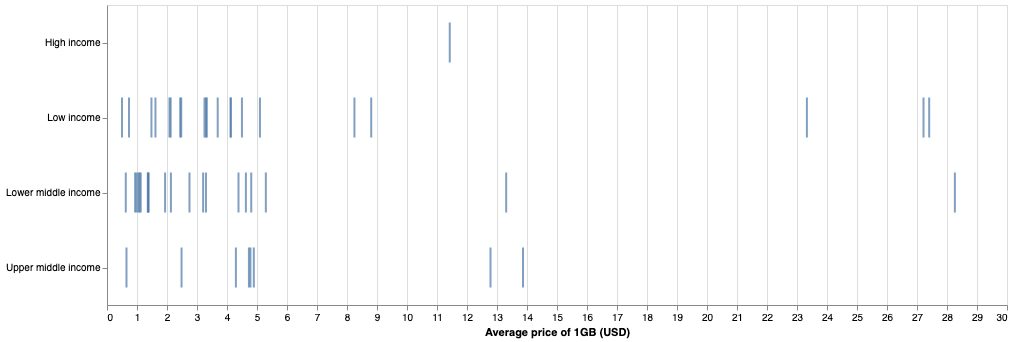

In [53]:
alt.Chart(africa).mark_tick(height=40, thickness=2).encode(
    alt.X('Average price of 1GB (USD):Q'),
    alt.Y('IncomeGroup:N', title=''),
    tooltip=['country', 'Average price of 1GB (USD)'],
    #color=alt.Color('IncomeGroup:N',scale=alt.Scale(domain=['High income', 'Upper middle income','Lower middle income','Low income'],range=["#002D5A","#008FE6","#EB6E14","#BE232D"]))
).interactive().properties(width=900, height=300)

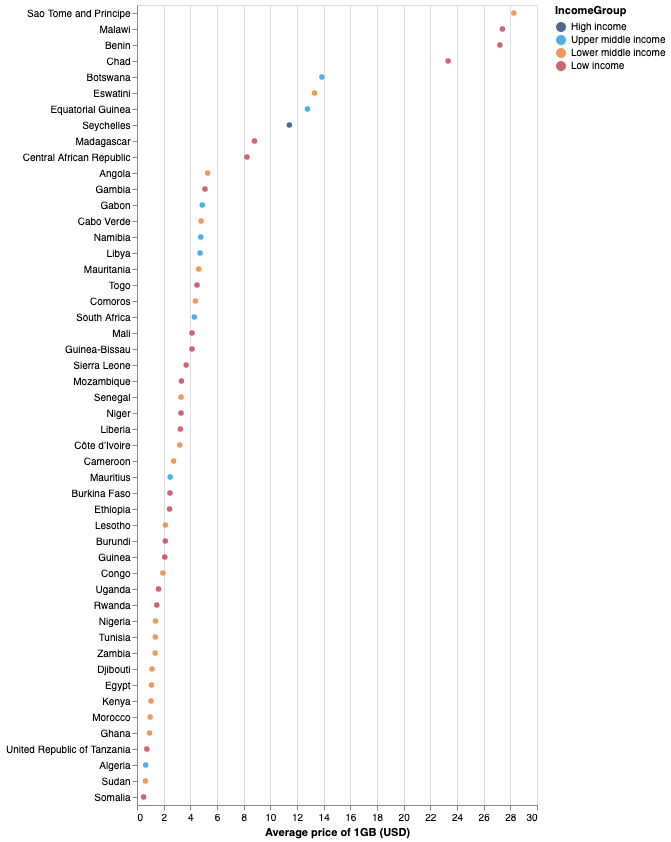

In [54]:
alt.Chart(africa).mark_circle(height=20, thickness=2).encode(
    alt.X('Average price of 1GB (USD):Q', ),
    alt.Y('country:N', title='', sort={"encoding": "x", "order": "descending"}),
    #tooltip=['country', 'Average price of 1GB (USD)'],
    color=alt.Color('IncomeGroup:N',scale=alt.Scale(domain=['High income', 'Upper middle income','Lower middle income','Low income'],range=["#002D5A","#008FE6","#EB6E14","#BE232D"]))
).interactive().properties(width=400, height=800)

## Prices in relation to monthly income

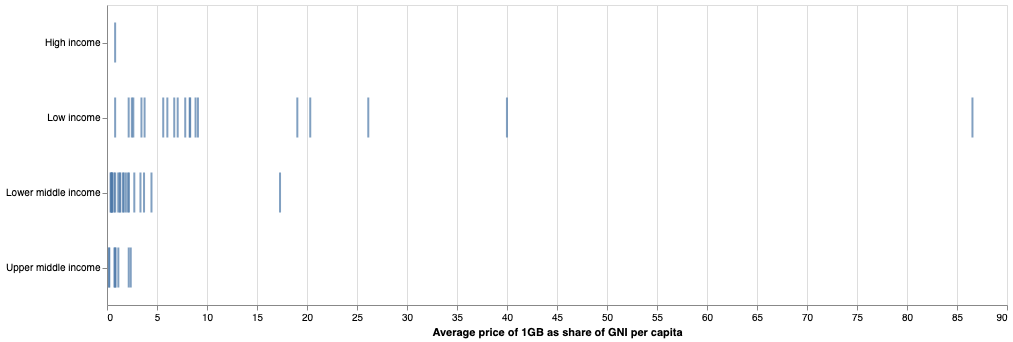

In [55]:
alt.Chart(africa).mark_tick(height=40, thickness=2).encode(
    alt.X('Average price of 1GB as share of GNI per capita:Q'),
    alt.Y('IncomeGroup:N', title=''),
    tooltip=['country', 'Average price of 1GB as share of GNI per capita', 'Average price of 1GB (USD)'],
    #color=alt.Color('IncomeGroup:N',scale=alt.Scale(domain=['High income', 'Upper middle income','Lower middle income','Low income'],range=["#002D5A","#008FE6","#EB6E14","#BE232D"]))
).interactive().properties(width=900, height=300)

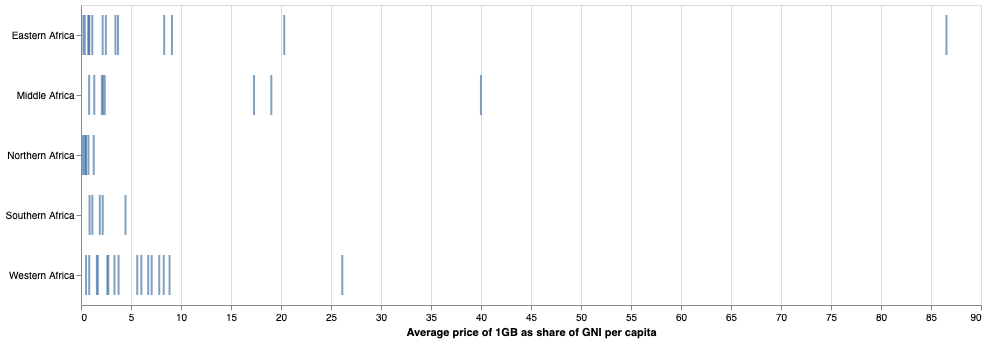

In [56]:
alt.Chart(africa).mark_tick(height=40, thickness=2).encode(
    alt.X('Average price of 1GB as share of GNI per capita:Q'),
    alt.Y('subregion:N', title=''),
    tooltip=['country', 'Average price of 1GB as share of GNI per capita', 'Average price of 1GB (USD)'],
    #color=alt.Color('IncomeGroup:N',scale=alt.Scale(domain=['High income', 'Upper middle income','Lower middle income','Low income'],range=["#002D5A","#008FE6","#EB6E14","#BE232D"]))
).interactive().properties(width=900, height=300)

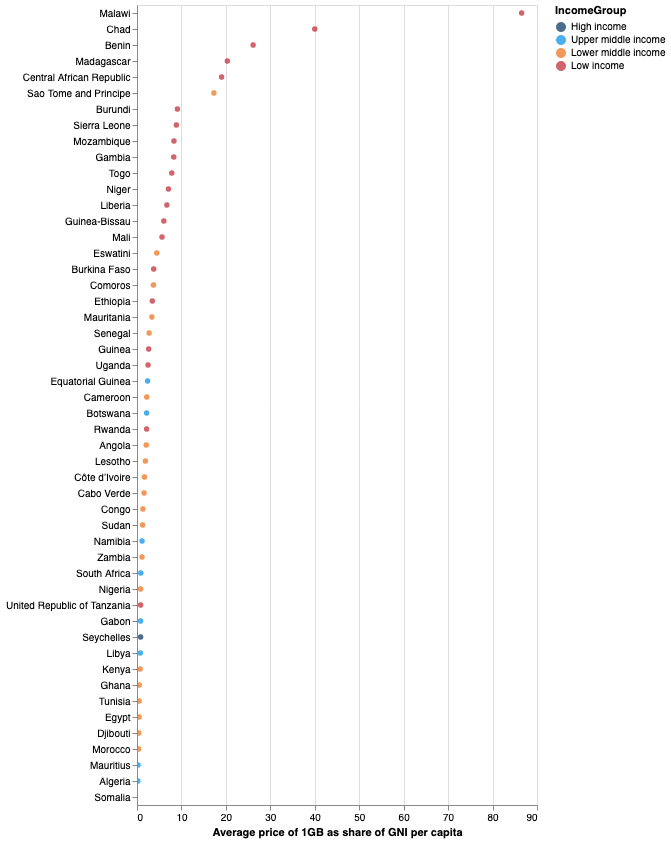

In [57]:
alt.Chart(africa).mark_circle(height=20, thickness=2).encode(
    alt.X('Average price of 1GB as share of GNI per capita:Q', ),
    alt.Y('country:N', title='', sort={"encoding": "x", "order": "descending"}),
    tooltip=['country','Average price of 1GB as share of GNI per capita', 'Average price of 1GB (USD)'],
    color=alt.Color('IncomeGroup:N',scale=alt.Scale(domain=['High income', 'Upper middle income','Lower middle income','Low income'],range=["#002D5A","#008FE6","#EB6E14","#BE232D"]))
).interactive().properties(width=400, height=800)

## Affordability threshold

"As A4AI defines internet as being affordable when 1GB of mobile data is priced at no more than 2% of average income"

"UN Broadband Commission’s target of 2% of monthly income."

In [58]:
len(africa[africa['Average price of 1GB as share of GNI per capita']<2.0])

21

In [59]:
len(africa[africa['Average price of 1GB as share of GNI per capita']>2.0])

28

In [60]:
# where is it above in african countries
africa[africa['Average price of 1GB as share of GNI per capita']>2.0]['country']

59                       Rwanda
65                       Uganda
75                       Guinea
78                      Burundi
87                     Ethiopia
89                 Burkina Faso
99                     Cameroon
108                     Liberia
111                       Niger
112                     Senegal
114                  Mozambique
119                Sierra Leone
132               Guinea-Bissau
133                        Mali
138                     Comoros
139                        Togo
141                  Mauritania
156                      Gambia
158                      Angola
173    Central African Republic
176                  Madagascar
192           Equatorial Guinea
193                    Eswatini
197                    Botswana
201                        Chad
202                       Benin
203                      Malawi
204       Sao Tome and Principe
Name: country, dtype: object

In [61]:
# where is it below in african countries
africa[africa['Average price of 1GB as share of GNI per capita']<=2.0]['country']

12                           Sudan
14                         Algeria
21     United Republic of Tanzania
32                           Ghana
34                         Morocco
38                           Kenya
41                           Egypt
44                        Djibouti
51                          Zambia
52                         Tunisia
53                         Nigeria
72                           Congo
80                         Lesotho
91                       Mauritius
105                  Côte d’Ivoire
137                   South Africa
145                          Libya
147                        Namibia
148                     Cabo Verde
151                          Gabon
187                     Seychelles
Name: country, dtype: object

# Development over time

### Comparison CableUK data 2020 vs 2018

In [63]:
df2 = pd.read_excel('data/CableUK-global-mobile-data-price-comparison-2019.xlsx')
df2.head()

,Rank,Country code,Name,Continental region,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB (USD),Most expensive 1GB (Local currency),Most expensive 1GB (USD),Sample date,Checked?,Mistake?,Percentage complete:,0.9956331877729258
0,1,IN,India,ASIA (EX. NEAR EAST),57,18.496586,INR,0.014001,0.258965,1.750000,0.024501,99.900000,1.398670,2018-11-09,DH,Wrong currency,NaN,NaN
1,2,KG,Kyrgyzstan,CIS (FORMER USSR),12,18.773810,KGS,0.014335,0.269120,5.312500,0.076154,33.333333,0.477829,2018-11-12,PWJ,Wrong currency,NaN,NaN
2,3,KZ,Kazakhstan,CIS (FORMER USSR),26,186.142571,KZT,0.002656,0.494376,107.272727,0.284906,296.666667,0.787917,2018-11-12,PWJ,No,NaN,NaN
3,4,UA,Ukraine,CIS (FORMER USSR),12,13.983532,UAH,0.036801,0.514611,5.633333,0.207314,37.500000,1.380046,2018-10-29,PWJ,No,NaN,NaN
4,5,RW,Rwanda,SUB-SAHARAN AFRICA,36,504.306984,RWF,0.001112,0.560638,34.990000,0.038898,2500.000000,2.779250,2018-11-19,PWJ,No,NaN,NaN


In [64]:
df2['Sample date'].value_counts()

2018-11-08    16
2018-11-06    15
2018-11-13    13
2018-10-29    13
2018-10-26    13
2018-11-12    13
2018-10-30    12
2018-11-21    12
2018-11-19    12
2018-11-07    10
2018-10-25    10
2018-11-20    10
2018-11-09    10
2018-11-22     9
2018-10-23     9
2018-11-16     8
2018-10-24     8
2018-11-05     7
2018-11-02     7
2018-11-14     6
2018-11-15     6
2018-11-27     3
2018-11-26     2
2018-10-31     2
2018-11-01     1
2018-11-28     1
2019-02-15     1
2019-11-21     1
Name: Sample date, dtype: int64

In [65]:
df2_selection = df2[['Name', 'Average price of 1GB (USD)', 'Cheapest 1GB (USD)', 'Sample date']]

In [66]:
df2_selection.columns =([ 'country', '2018Q4_median_1GB_CableUK', '2018Q4_cheapest_1GB_CableUK', '2018_Sample_date'])

In [67]:
df_merged.head()

,Rank,country,country_code,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 27/04/2020),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB for 30 days (USD),...,Sample date,price_range_USD,continent,region,subregion,M49 code,IncomeGroup,gni_percap_cUSD,monthly_gni_pc_USD,Average price of 1GB as share of GNI per capita
0,1,India,IND,60,6.656667,INR,0.013131,0.087409,1.625000,0.021338,...,2020-02-14,2.724260,Asia,Southern Asia,Southern Asia,356.0,Lower middle income,2130.0,177.500000,0.049245
1,2,Israel,ISR,17,0.399000,ILS,0.284986,0.113710,0.226667,0.064597,...,2020-02-14,0.313485,Asia,Western Asia,Western Asia,376.0,High income,43290.0,3607.500000,0.003152
2,3,Kyrgyzstan,KGZ,15,16.666667,KGS,0.012441,0.207352,7.666667,0.095382,...,2020-02-17,0.482242,Asia,Central Asia,Central Asia,417.0,Lower middle income,1240.0,103.333333,0.200664
3,4,Italy,ITA,42,0.399583,EUR,1.084990,0.433544,0.080000,0.086799,...,2020-02-14,7.497281,Europe,Southern Europe,Southern Europe,380.0,High income,34460.0,2871.666667,0.015097
4,5,Ukraine,UKR,12,12.500000,UAH,0.036976,0.462196,6.666667,0.246505,...,2020-02-24,1.232524,Europe,Eastern Europe,Eastern Europe,804.0,Lower middle income,3370.0,280.833333,0.164580


In [68]:
df_merged = df_merged.merge(df2_selection, left_on='country', right_on='country')

In [69]:
df_merged.head()

,Rank,country,country_code,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 27/04/2020),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB for 30 days (USD),...,region,subregion,M49 code,IncomeGroup,gni_percap_cUSD,monthly_gni_pc_USD,Average price of 1GB as share of GNI per capita,2018Q4_median_1GB_CableUK,2018Q4_cheapest_1GB_CableUK,2018_Sample_date
0,1,India,IND,60,6.656667,INR,0.013131,0.087409,1.625000,0.021338,...,Southern Asia,Southern Asia,356.0,Lower middle income,2130.0,177.500000,0.049245,0.258965,0.024501,2018-11-09
1,2,Israel,ISR,17,0.399000,ILS,0.284986,0.113710,0.226667,0.064597,...,Western Asia,Western Asia,376.0,High income,43290.0,3607.500000,0.003152,0.901251,0.107466,2018-11-09
2,3,Kyrgyzstan,KGZ,15,16.666667,KGS,0.012441,0.207352,7.666667,0.095382,...,Central Asia,Central Asia,417.0,Lower middle income,1240.0,103.333333,0.200664,0.269120,0.076154,2018-11-12
3,4,Italy,ITA,42,0.399583,EUR,1.084990,0.433544,0.080000,0.086799,...,Southern Europe,Southern Europe,380.0,High income,34460.0,2871.666667,0.015097,1.725332,0.180691,2018-11-12
4,5,Ukraine,UKR,12,12.500000,UAH,0.036976,0.462196,6.666667,0.246505,...,Eastern Europe,Eastern Europe,804.0,Lower middle income,3370.0,280.833333,0.164580,0.514611,0.207314,2018-10-29


In [70]:
df_merged['2018Q4_median_1GB_%share_GNI/pc_CableUK'] = df_merged['2018Q4_median_1GB_CableUK'] / df_merged['monthly_gni_pc_USD'] *100
df_merged['2018Q4_cheapest_1GB_%share_GNI/pc_CableUK'] = df_merged['2018Q4_cheapest_1GB_CableUK'] / df_merged['monthly_gni_pc_USD'] *100

In [71]:
df_merged.head()

,Rank,country,country_code,Plans measured,Average price of 1GB (local currency),Currency,Conversion rate (USD) (Frozen 27/04/2020),Average price of 1GB (USD),Cheapest 1GB (Local currency),Cheapest 1GB for 30 days (USD),...,M49 code,IncomeGroup,gni_percap_cUSD,monthly_gni_pc_USD,Average price of 1GB as share of GNI per capita,2018Q4_median_1GB_CableUK,2018Q4_cheapest_1GB_CableUK,2018_Sample_date,2018Q4_median_1GB_%share_GNI/pc_CableUK,2018Q4_cheapest_1GB_%share_GNI/pc_CableUK
0,1,India,IND,60,6.656667,INR,0.013131,0.087409,1.625000,0.021338,...,356.0,Lower middle income,2130.0,177.500000,0.049245,0.258965,0.024501,2018-11-09,0.145896,0.013804
1,2,Israel,ISR,17,0.399000,ILS,0.284986,0.113710,0.226667,0.064597,...,376.0,High income,43290.0,3607.500000,0.003152,0.901251,0.107466,2018-11-09,0.024983,0.002979
2,3,Kyrgyzstan,KGZ,15,16.666667,KGS,0.012441,0.207352,7.666667,0.095382,...,417.0,Lower middle income,1240.0,103.333333,0.200664,0.269120,0.076154,2018-11-12,0.260439,0.073697
3,4,Italy,ITA,42,0.399583,EUR,1.084990,0.433544,0.080000,0.086799,...,380.0,High income,34460.0,2871.666667,0.015097,1.725332,0.180691,2018-11-12,0.060081,0.006292
4,5,Ukraine,UKR,12,12.500000,UAH,0.036976,0.462196,6.666667,0.246505,...,804.0,Lower middle income,3370.0,280.833333,0.164580,0.514611,0.207314,2018-10-29,0.183244,0.073821


In [72]:
df_merged.columns

Index(['Rank', 'country', 'country_code', 'Plans measured',
       'Average price of 1GB (local currency)', 'Currency',
       'Conversion rate (USD) (Frozen 27/04/2020)',
       'Average price of 1GB (USD)', 'Cheapest 1GB (Local currency)',
       'Cheapest 1GB for 30 days (USD)', 'Most expensive 1GB (Local currency)',
       'Most expensive 1GB (USD)', 'Sample date', 'price_range_USD',
       'continent', 'region', 'subregion', 'M49 code', 'IncomeGroup',
       'gni_percap_cUSD', 'monthly_gni_pc_USD',
       'Average price of 1GB as share of GNI per capita',
       '2018Q4_median_1GB_CableUK', '2018Q4_cheapest_1GB_CableUK',
       '2018_Sample_date', '2018Q4_median_1GB_%share_GNI/pc_CableUK',
       '2018Q4_cheapest_1GB_%share_GNI/pc_CableUK'],
      dtype='object')

In [73]:
CableUK_comparison = df_merged [['country', 'country_code', 'continent', 'Average price of 1GB as share of GNI per capita','2018Q4_median_1GB_%share_GNI/pc_CableUK']]

In [74]:
CableUK_comparison.columns =(['country', 'country_code', 'continent', '2020Q1_median_1GB_%share_GNI/pc_CableUK','2018Q4_median_1GB_%share_GNI/pc_CableUK'])

In [75]:
CableUK_comparison.head()

,country,country_code,continent,2020Q1_median_1GB_%share_GNI/pc_CableUK,2018Q4_median_1GB_%share_GNI/pc_CableUK
0,India,IND,Asia,0.049245,0.145896
1,Israel,ISR,Asia,0.003152,0.024983
2,Kyrgyzstan,KGZ,Asia,0.200664,0.260439
3,Italy,ITA,Europe,0.015097,0.060081
4,Ukraine,UKR,Europe,0.164580,0.183244


In [76]:
CableUK_comparison['pcp_change'] = (CableUK_comparison['2020Q1_median_1GB_%share_GNI/pc_CableUK']-CableUK_comparison['2018Q4_median_1GB_%share_GNI/pc_CableUK'])
CableUK_comparison['pct_change'] = (CableUK_comparison['2020Q1_median_1GB_%share_GNI/pc_CableUK']-CableUK_comparison['2018Q4_median_1GB_%share_GNI/pc_CableUK'])/CableUK_comparison['2018Q4_median_1GB_%share_GNI/pc_CableUK']*100
CableUK_comparison.head()

/Users/grueng/.virtualenvs/dw_data/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/grueng/.virtualenvs/dw_data/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,country,country_code,continent,2020Q1_median_1GB_%share_GNI/pc_CableUK,2018Q4_median_1GB_%share_GNI/pc_CableUK,pcp_change,pct_change
0,India,IND,Asia,0.049245,0.145896,-0.096651,-66.246621
1,Israel,ISR,Asia,0.003152,0.024983,-0.021831,-87.383146
2,Kyrgyzstan,KGZ,Asia,0.200664,0.260439,-0.059775,-22.951729
3,Italy,ITA,Europe,0.015097,0.060081,-0.044984,-74.871848
4,Ukraine,UKR,Europe,0.164580,0.183244,-0.018664,-10.185334


In [77]:
# share of countries per continent where prices rose/fell
continents = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

pricing_change_overview = []

for continent in continents:
    continent_dict = {}
    continent_dict['continent'] = continent
    df_continent = CableUK_comparison[CableUK_comparison['continent'] == continent]
    countries_count = len(df_continent)
    country_count_price_increase = len(df_continent[df_continent['pct_change']>=0])
    country_count_price_decrease = len(df_continent[df_continent['pct_change']<0])
    continent_dict['number_countries_increase'] = country_count_price_increase
    continent_dict['number_countries_decrease'] = country_count_price_decrease
    continent_dict['total_countries_count'] = countries_count
    continent_dict['share_increase'] = country_count_price_increase / countries_count * 100
    continent_dict['share_decrease'] = country_count_price_decrease / countries_count * 100
    pricing_change_overview.append(continent_dict)

price_change_overview = pd.DataFrame(pricing_change_overview)
price_change_overview.head().sort_values(by='share_increase', ascending = False)

,continent,number_countries_decrease,number_countries_increase,share_decrease,share_increase,total_countries_count
0,Africa,32,12,71.111111,26.666667,45
4,Oceania,7,2,41.176471,11.764706,17
1,Americas,29,3,74.358974,7.692308,39
2,Asia,36,2,85.714286,4.761905,42
3,Europe,33,1,80.487805,2.439024,41


### Development in African countries

In [78]:
CableUK_comparison_continent = CableUK_comparison[CableUK_comparison['continent']=='Africa']

In [79]:
CableUK_comparison_continent_melted = CableUK_comparison_continent[['country','2018Q4_median_1GB_%share_GNI/pc_CableUK', '2020Q1_median_1GB_%share_GNI/pc_CableUK' ]]

In [80]:
CableUK_comparison_continent_melted.head()

,country,2018Q4_median_1GB_%share_GNI/pc_CableUK,2020Q1_median_1GB_%share_GNI/pc_CableUK
6,Somalia,NaN,NaN
11,Sudan,1.374682,1.272566
13,Algeria,1.556862,0.196253
29,Ghana,0.842113,0.506629
31,Morocco,0.623484,0.370581


In [81]:
CableUK_comparison_continent_melted = CableUK_comparison_continent_melted.melt(id_vars=['country'], var_name = 'reference_year', value_name='median_price_pct_share_GNIpc')

In [82]:
CableUK_comparison_continent_melted.head()

,country,reference_year,median_price_pct_share_GNIpc
0,Somalia,2018Q4_median_1GB_%share_GNI/pc_CableUK,NaN
1,Sudan,2018Q4_median_1GB_%share_GNI/pc_CableUK,1.374682
2,Algeria,2018Q4_median_1GB_%share_GNI/pc_CableUK,1.556862
3,Ghana,2018Q4_median_1GB_%share_GNI/pc_CableUK,0.842113
4,Morocco,2018Q4_median_1GB_%share_GNI/pc_CableUK,0.623484


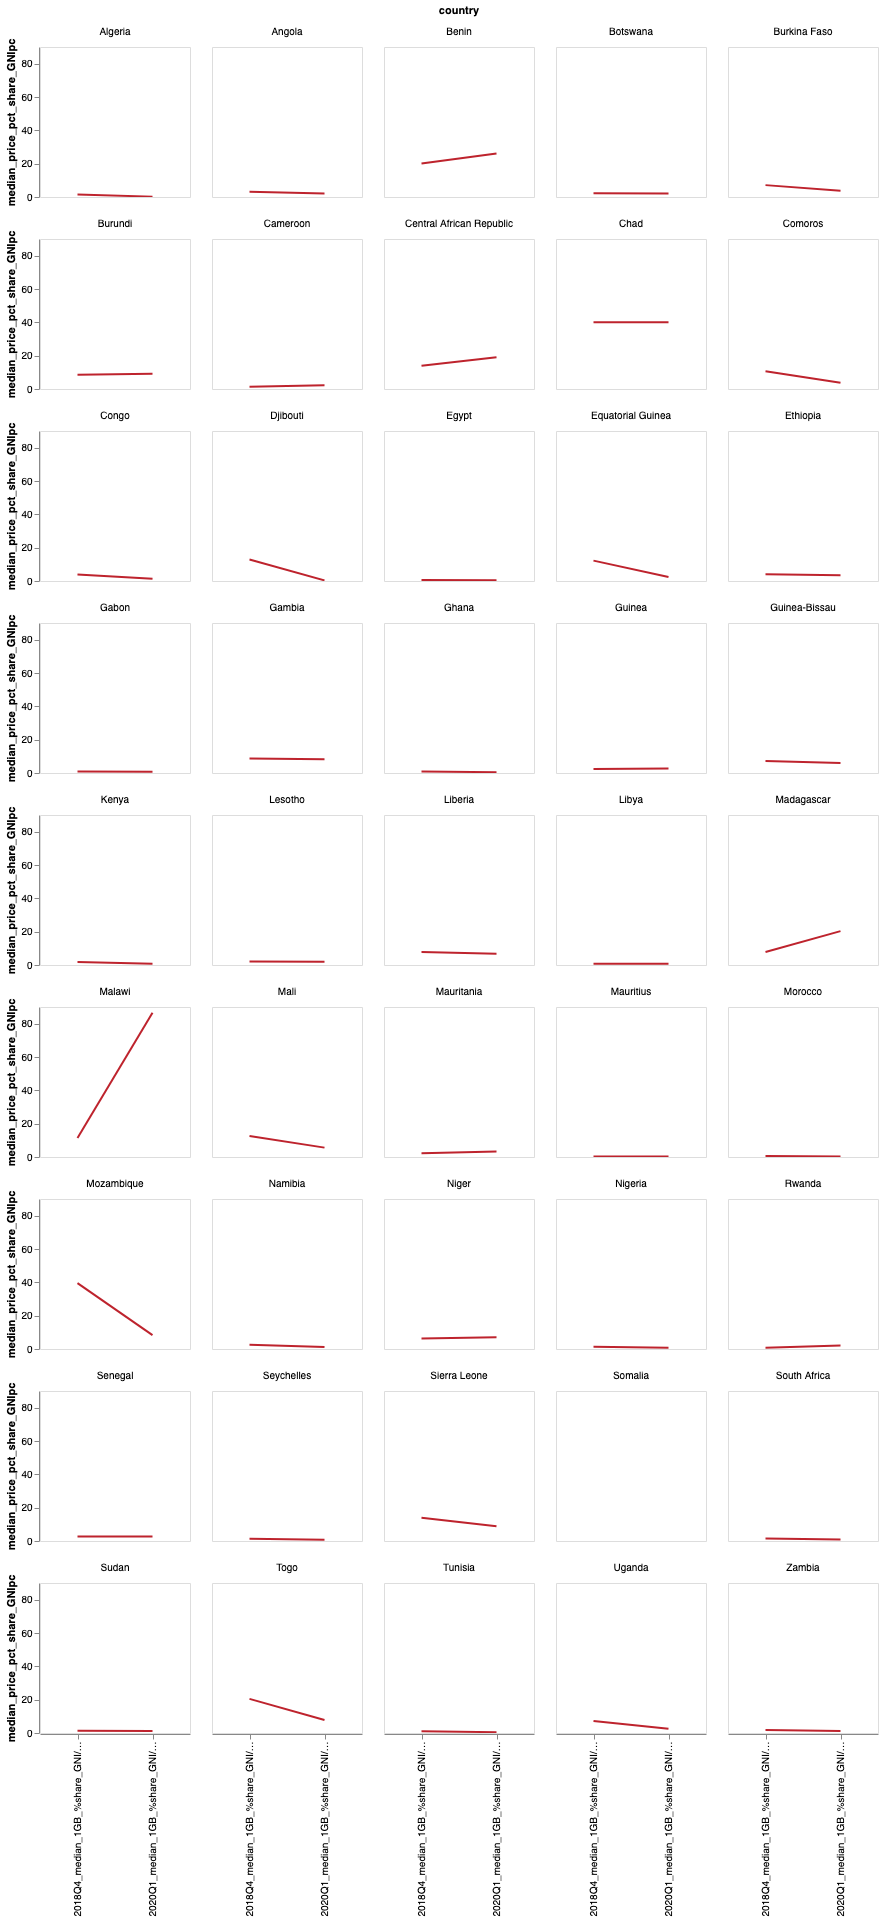

In [83]:
smallmultiple_price_changes= alt.Chart(CableUK_comparison_continent_melted).mark_line(color='#BE232D').encode(
    #y='cases',
    alt.Y('median_price_pct_share_GNIpc:Q'),
    alt.X('reference_year', title =''),
    tooltip=['reference_year', 'median_price_pct_share_GNIpc']
    ).properties(
        width=150,
        height=150
    ).facet(
        facet='country:N',
        columns=5
    ).configure_axis(
        grid=False
    ).interactive()

smallmultiple_price_changes.save('change.svg')
smallmultiple_price_changes

In [85]:
CableUK_comparison_continent[CableUK_comparison_continent['pct_change']>=0].sort_values(by='pct_change', ascending = False)

,country,country_code,continent,2020Q1_median_1GB_%share_GNI/pc_CableUK,2018Q4_median_1GB_%share_GNI/pc_CableUK,pcp_change,pct_change
181,Malawi,MWI,Africa,86.545768,11.337502,75.208267,663.358378
54,Rwanda,RWA,Africa,2.167805,0.820446,1.347359,164.222749
157,Madagascar,MDG,Africa,20.324731,7.817040,12.507690,160.005450
92,Cameroon,CMR,Africa,2.199352,1.370714,0.828638,60.452967
129,Mauritania,MRT,Africa,3.346504,2.258966,1.087538,48.143184
154,Central African Republic,CAF,Africa,19.032854,13.920577,5.112277,36.724605
180,Benin,BEN,Africa,26.128302,20.146994,5.981308,29.688341
100,Niger,NER,Africa,7.069346,6.247549,0.821796,13.153899
69,Guinea,GIN,Africa,2.630940,2.445878,0.185062,7.566286
72,Burundi,BDI,Africa,9.093343,8.577843,0.515499,6.009663


In [86]:
#number of countries where prices increased
len(CableUK_comparison_continent[CableUK_comparison_continent['pct_change']>=0])

12

In [87]:
CableUK_comparison_continent[CableUK_comparison_continent['pct_change']<0].sort_values(by='pct_change')

,country,country_code,continent,2020Q1_median_1GB_%share_GNI/pc_CableUK,2018Q4_median_1GB_%share_GNI/pc_CableUK,pcp_change,pct_change
40,Djibouti,DJI,Africa,0.381017,12.855873,-12.474856,-97.036242
13,Algeria,DZA,Africa,0.196253,1.556862,-1.360609,-87.394347
171,Equatorial Guinea,GNQ,Africa,2.374687,12.227646,-9.852958,-80.579357
102,Mozambique,MOZ,Africa,8.317315,39.547925,-31.230610,-78.969024
66,Congo,COG,Africa,1.327650,3.860148,-2.532498,-65.606235
60,Uganda,UGA,Africa,2.484738,7.222069,-4.737331,-65.595204
126,Comoros,COM,Africa,3.704012,10.621835,-6.917822,-65.128319
127,Togo,TGO,Africa,7.823782,20.458903,-12.635121,-61.758546
35,Kenya,KEN,Africa,0.718001,1.873303,-1.155302,-61.671921
133,Namibia,NAM,Africa,1.134034,2.612625,-1.478590,-56.594057


In [88]:
CableUK_comparison_continent[(CableUK_comparison_continent['pct_change']>0)&(CableUK_comparison_continent['2018Q4_median_1GB_%share_GNI/pc_CableUK']>2.0)].sort_values(by='pct_change')

,country,country_code,continent,2020Q1_median_1GB_%share_GNI/pc_CableUK,2018Q4_median_1GB_%share_GNI/pc_CableUK,pcp_change,pct_change
101,Senegal,SEN,Africa,2.730230,2.716593,0.013637,0.502007
72,Burundi,BDI,Africa,9.093343,8.577843,0.515499,6.009663
69,Guinea,GIN,Africa,2.630940,2.445878,0.185062,7.566286
100,Niger,NER,Africa,7.069346,6.247549,0.821796,13.153899
180,Benin,BEN,Africa,26.128302,20.146994,5.981308,29.688341
154,Central African Republic,CAF,Africa,19.032854,13.920577,5.112277,36.724605
129,Mauritania,MRT,Africa,3.346504,2.258966,1.087538,48.143184
157,Madagascar,MDG,Africa,20.324731,7.817040,12.507690,160.005450
181,Malawi,MWI,Africa,86.545768,11.337502,75.208267,663.358378


In [89]:
CableUK_comparison_continent[(CableUK_comparison_continent['pct_change']<0)&(CableUK_comparison_continent['2020Q1_median_1GB_%share_GNI/pc_CableUK']>2.0)].sort_values(by='pct_change')



,country,country_code,continent,2020Q1_median_1GB_%share_GNI/pc_CableUK,2018Q4_median_1GB_%share_GNI/pc_CableUK,pcp_change,pct_change
171,Equatorial Guinea,GNQ,Africa,2.374687,12.227646,-9.852958,-80.579357
102,Mozambique,MOZ,Africa,8.317315,39.547925,-31.230610,-78.969024
60,Uganda,UGA,Africa,2.484738,7.222069,-4.737331,-65.595204
126,Comoros,COM,Africa,3.704012,10.621835,-6.917822,-65.128319
127,Togo,TGO,Africa,7.823782,20.458903,-12.635121,-61.758546
121,Mali,MLI,Africa,5.623343,12.566200,-6.942857,-55.250248
83,Burkina Faso,BFA,Africa,3.758386,7.126141,-3.367754,-47.259161
107,Sierra Leone,SLE,Africa,8.855071,13.892780,-5.037708,-36.261341
142,Angola,AGO,Africa,2.083140,3.127550,-1.044410,-33.393871
120,Guinea-Bissau,GNB,Africa,6.034807,7.259330,-1.224522,-16.868255


In [90]:
#number of countries where prices fell
len(CableUK_comparison_continent[CableUK_comparison_continent['pct_change']<0])

32

## CableUK comparison 2018 vs 2020 - actual prices

In [92]:
variable_selection = ['country', 'country_code','2018Q4_median_1GB_CableUK', 'Average price of 1GB (USD)', 'continent', 'region', 'subregion', 'M49 code', 'IncomeGroup', 'monthly_gni_pc_USD',]

CableUK_comparison2 = df_merged[variable_selection]
CableUK_comparison2.columns= (['country', 'country_code','2018Q4_median_1GB_CableUK', '2020Q1_median_1GB_CableUK', 'continent', 'region', 'subregion', 'M49 code', 'IncomeGroup', 'monthly_gni_pc_USD',])
CableUK_comparison2.head()

,country,country_code,2018Q4_median_1GB_CableUK,2020Q1_median_1GB_CableUK,continent,region,subregion,M49 code,IncomeGroup,monthly_gni_pc_USD
0,India,IND,0.258965,0.087409,Asia,Southern Asia,Southern Asia,356.0,Lower middle income,177.500000
1,Israel,ISR,0.901251,0.113710,Asia,Western Asia,Western Asia,376.0,High income,3607.500000
2,Kyrgyzstan,KGZ,0.269120,0.207352,Asia,Central Asia,Central Asia,417.0,Lower middle income,103.333333
3,Italy,ITA,1.725332,0.433544,Europe,Southern Europe,Southern Europe,380.0,High income,2871.666667
4,Ukraine,UKR,0.514611,0.462196,Europe,Eastern Europe,Eastern Europe,804.0,Lower middle income,280.833333


In [93]:
CableUK_comparison2['price_change_USD'] = CableUK_comparison2['2020Q1_median_1GB_CableUK'] - CableUK_comparison2['2018Q4_median_1GB_CableUK']

/Users/grueng/.virtualenvs/dw_data/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
CableUK_comparison2_africa = CableUK_comparison2[CableUK_comparison2['continent']=='Africa']

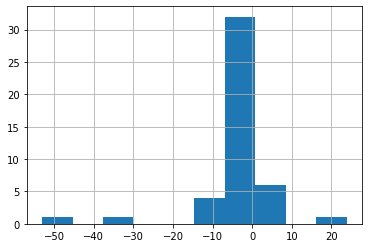

In [95]:
CableUK_comparison2_africa['price_change_USD'].hist()

In [96]:
CableUK_comparison2_africa.sort_values(by='price_change_USD')

,country,country_code,2018Q4_median_1GB_CableUK,2020Q1_median_1GB_CableUK,continent,region,subregion,M49 code,IncomeGroup,monthly_gni_pc_USD,price_change_USD
171,Equatorial Guinea,GNQ,65.825492,12.783734,Africa,Sub-Saharan Africa,Middle Africa,226.0,Upper middle income,538.333333,-53.041758
40,Djibouti,DJI,37.924825,1.124000,Africa,Sub-Saharan Africa,Eastern Africa,262.0,Lower middle income,295.000000,-36.800825
102,Mozambique,MOZ,15.819170,3.326926,Africa,Sub-Saharan Africa,Eastern Africa,508.0,Low income,40.000000,-12.492244
126,Comoros,COM,12.569171,4.383081,Africa,Sub-Saharan Africa,Eastern Africa,174.0,Lower middle income,118.333333,-8.186090
167,Seychelles,SYC,19.546084,11.425091,Africa,Sub-Saharan Africa,Eastern Africa,690.0,High income,1405.833333,-8.120993
127,Togo,TGO,11.763869,4.498675,Africa,Sub-Saharan Africa,Western Africa,768.0,Low income,57.500000,-7.265194
133,Namibia,NAM,11.016568,4.781845,Africa,Sub-Saharan Africa,Southern Africa,516.0,Upper middle income,421.666667,-6.234723
6,Somalia,SOM,6.191336,0.500000,Africa,Sub-Saharan Africa,Eastern Africa,706.0,Low income,NaN,-5.691336
121,Mali,MLI,9.215213,4.123785,Africa,Sub-Saharan Africa,Western Africa,466.0,Low income,73.333333,-5.091428
13,Algeria,DZA,5.150619,0.649269,Africa,Northern Africa,Northern Africa,12.0,Upper middle income,330.833333,-4.501349


### Before / after: actual prices

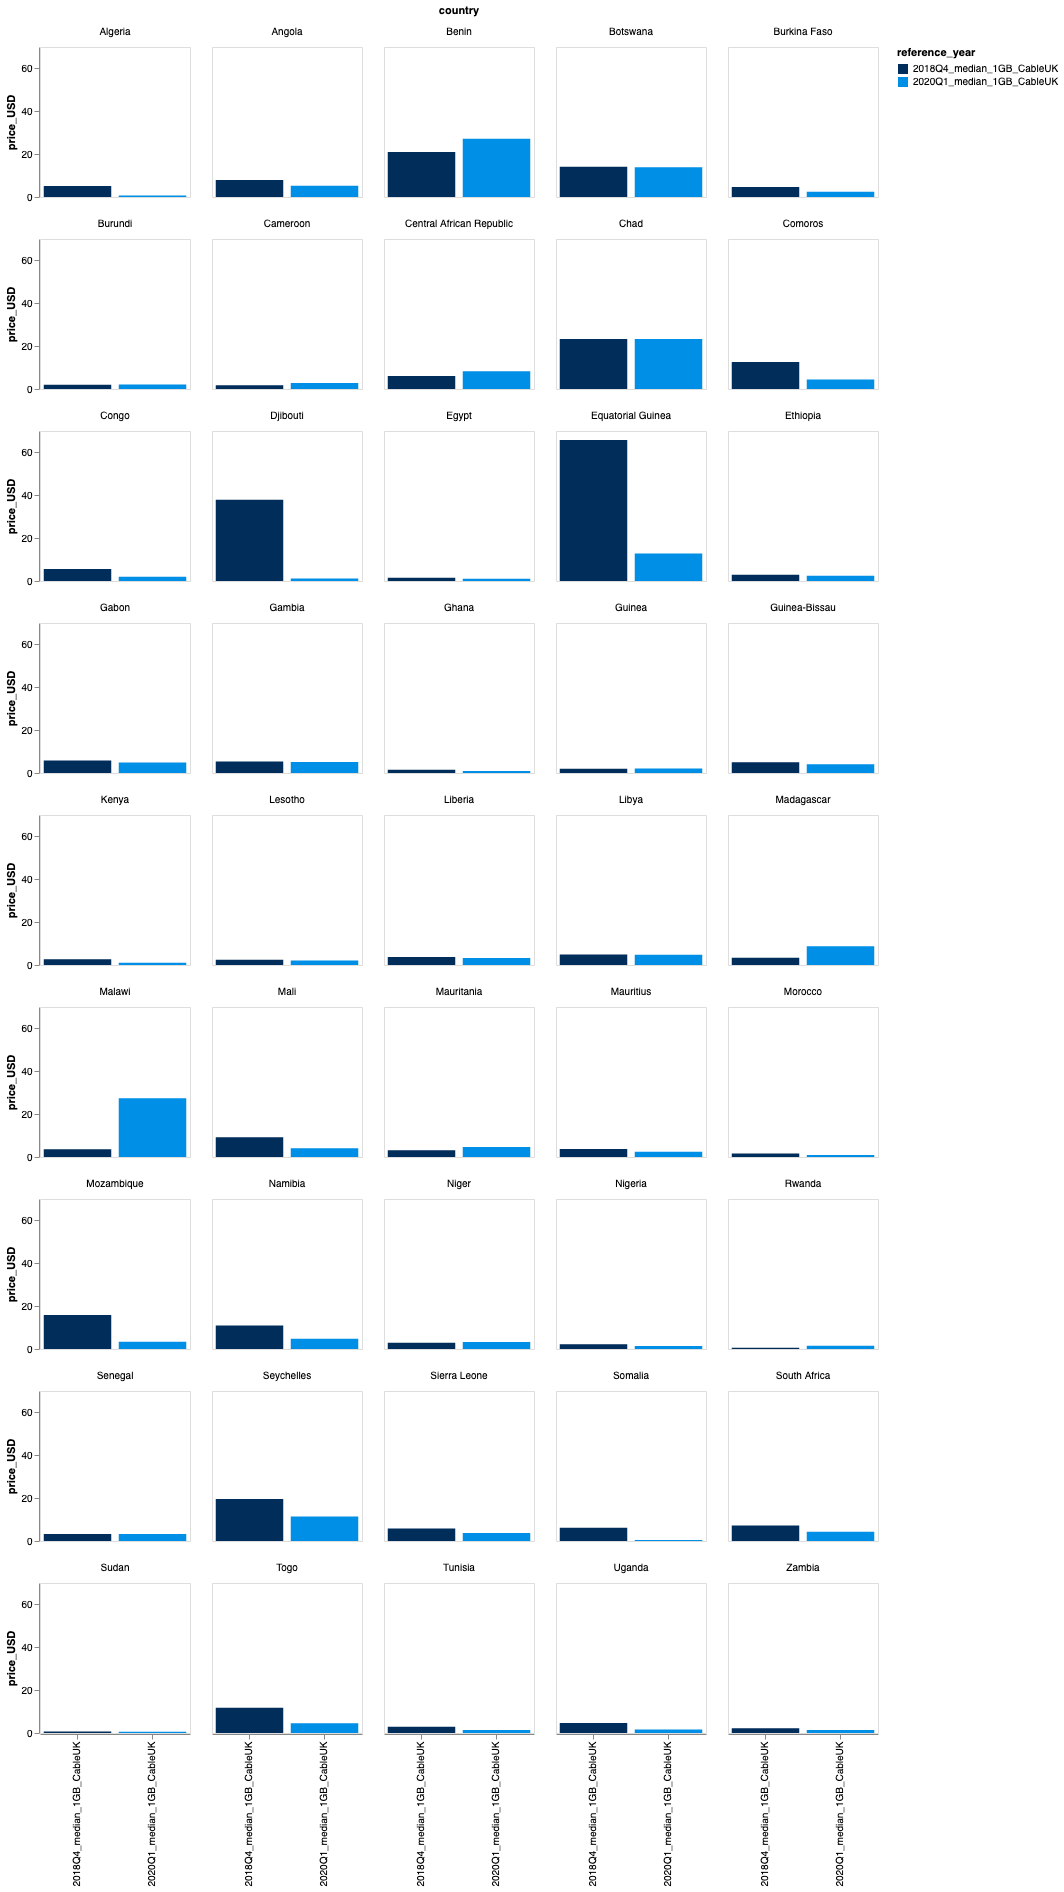

In [98]:
selection = CableUK_comparison2_africa[['country','2018Q4_median_1GB_CableUK','2020Q1_median_1GB_CableUK']]

CableUK_comparison2_africa_melted = selection.melt(id_vars=['country'], var_name = 'reference_year', value_name='price_USD')

smallmultiple_price_changes_absolute= alt.Chart(CableUK_comparison2_africa_melted).mark_bar(color='#BE232D').encode(
    #y='cases',
    alt.Y('price_USD:Q'),
    alt.X('reference_year', title =''),
    tooltip=['reference_year', 'price_USD'],
    color=alt.Color('reference_year:N',scale=alt.Scale(domain=['2018Q4_median_1GB_CableUK', '2020Q1_median_1GB_CableUK'],range=["#002D5A","#008FE6"]))
    ).properties(
        width=150,
        height=150
    ).facet(
        facet='country:N',
        columns=5
    ).configure_axis(
        grid=False
    ).interactive()

#smallmultiple_price_changes.save('change.svg')
smallmultiple_price_changes_absolute

### Before / after: price as share of GNI per capita

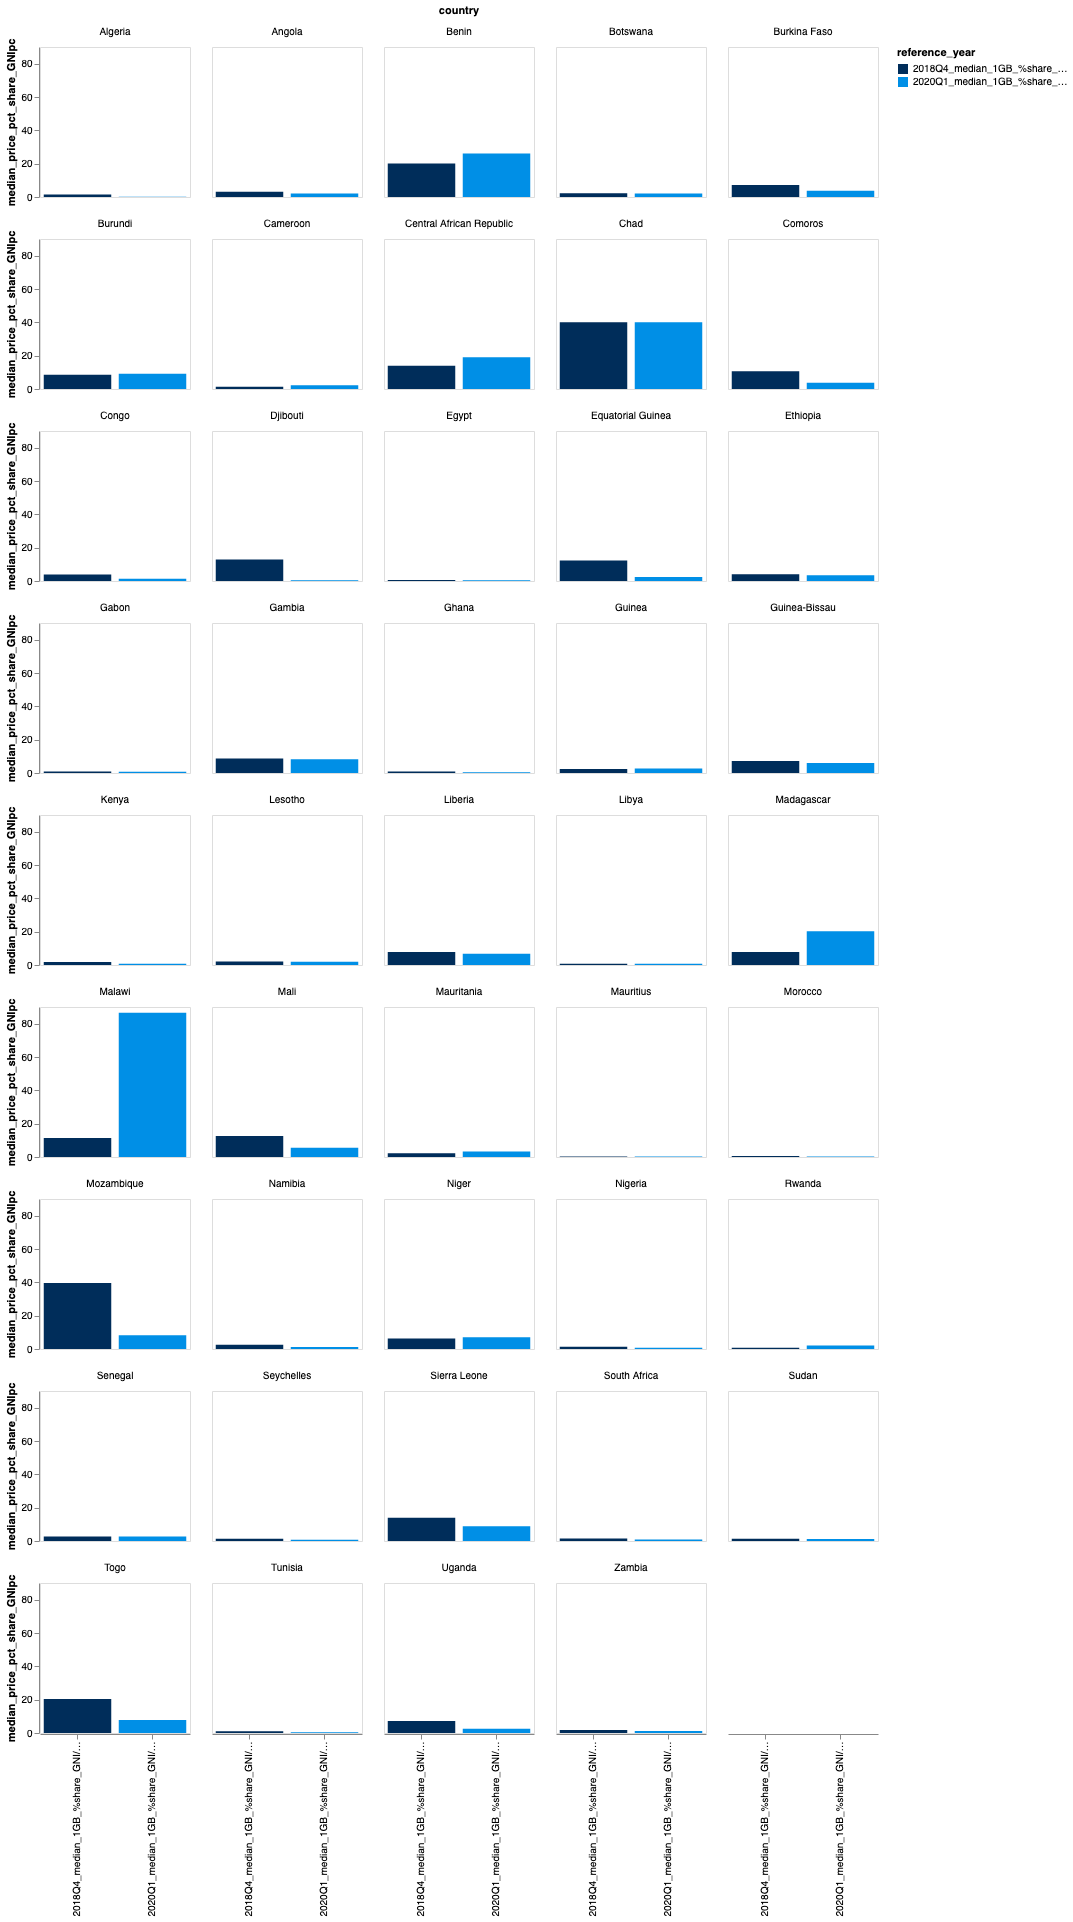

In [99]:
smallmultiple_price_changes= alt.Chart(CableUK_comparison_continent_melted).mark_bar().encode(
    #y='cases',
    alt.Y('median_price_pct_share_GNIpc:Q'),
    alt.X('reference_year', title =''),
    tooltip=['reference_year', 'median_price_pct_share_GNIpc'],
    color=alt.Color('reference_year:N',scale=alt.Scale(domain=['2018Q4_median_1GB_%share_GNI/pc_CableUK', '2020Q1_median_1GB_%share_GNI/pc_CableUK'],range=["#002D5A","#008FE6"]))
    ).properties(
        width=150,
        height=150
    ).facet(
        facet='country:N',
        columns=5
    ).configure_axis(
        grid=False
    ).interactive()

smallmultiple_price_changes.save('change.svg')
smallmultiple_price_changes

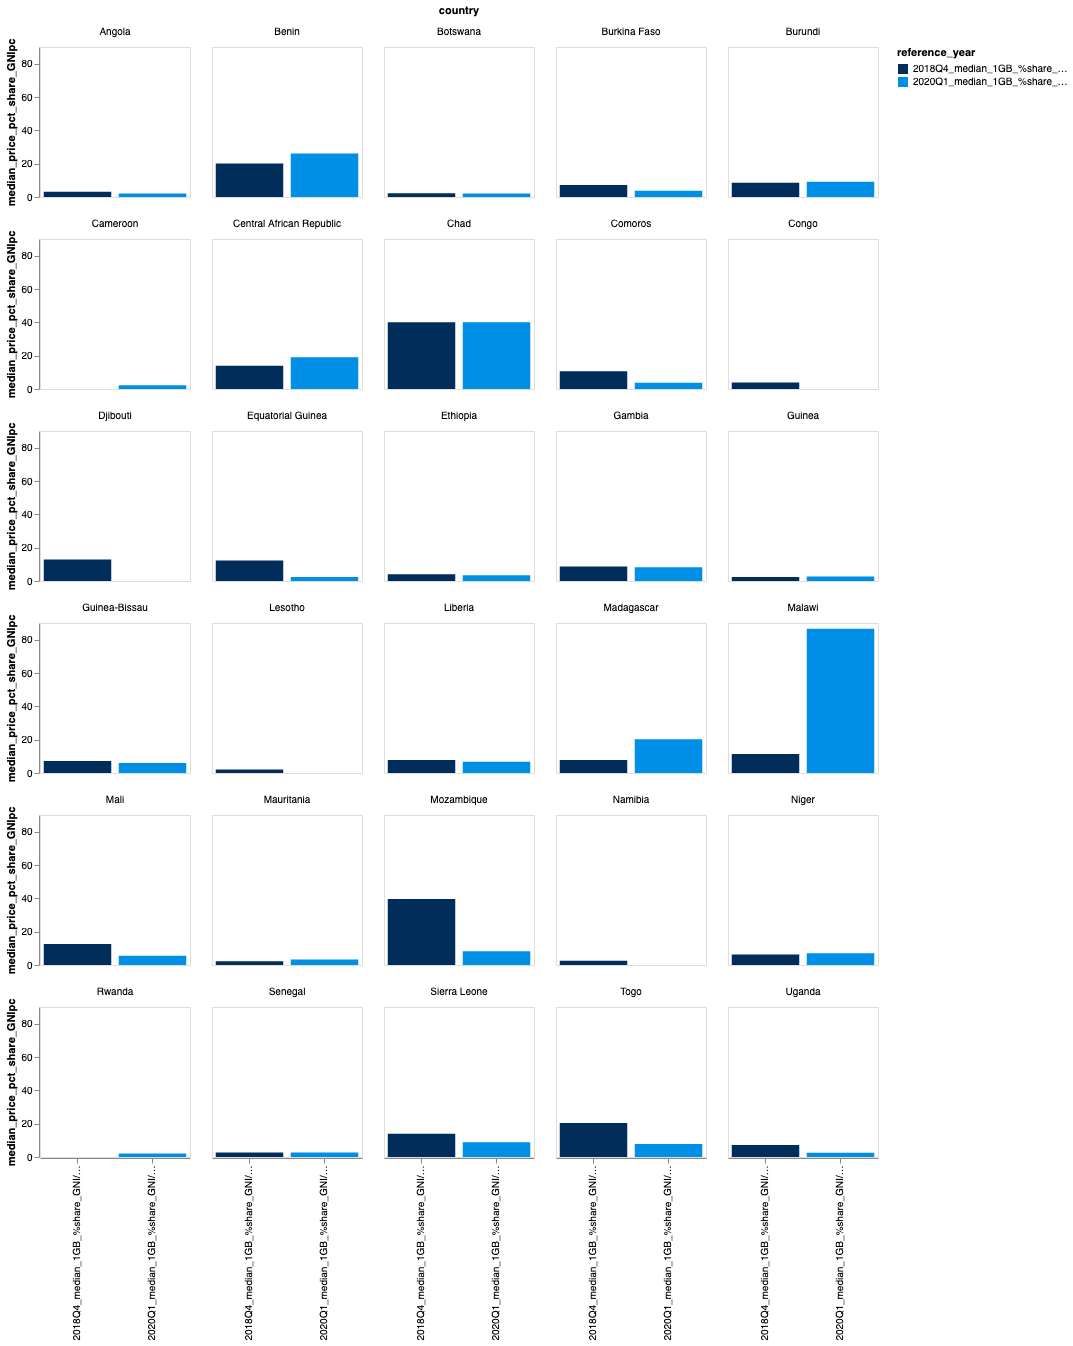

In [102]:
# include only those that are above UN threshold in 2020

reduced = CableUK_comparison_continent_melted[CableUK_comparison_continent_melted['median_price_pct_share_GNIpc']>2.0]

smallmultiple_price_changes= alt.Chart(reduced).mark_bar().encode(
    #y='cases',
    alt.Y('median_price_pct_share_GNIpc:Q'),
    alt.X('reference_year', title =''),
    tooltip=['reference_year', 'median_price_pct_share_GNIpc'],
    color=alt.Color('reference_year:N',scale=alt.Scale(domain=['2018Q4_median_1GB_%share_GNI/pc_CableUK', '2020Q1_median_1GB_%share_GNI/pc_CableUK'],range=["#002D5A","#008FE6"]))
    ).properties(
        width=150,
        height=150
    ).facet(
        facet='country:N',
        columns=5
    ).configure_axis(
        grid=False
    ).interactive()

smallmultiple_price_changes.save('change.svg')
smallmultiple_price_changes

In [151]:
# Show just price changes in US as bar chart
CableUK_comparison2_africa['should_be_price'] = CableUK_comparison2_africa['monthly_gni_pc_USD'] * 0.02

/Users/grueng/.virtualenvs/dw_data/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [153]:
not_affordable_africa = CableUK_comparison2_africa[CableUK_comparison2_africa['2020Q1_median_1GB_CableUK']>CableUK_comparison2_africa['should_be_price']]

In [161]:
not_affordable_africa.sort_values(by='price_change_USD',ascending = False)

,country,country_code,2018Q4_median_1GB_CableUK,2020Q1_median_1GB_CableUK,continent,region,subregion,M49 code,IncomeGroup,monthly_gni_pc_USD,price_change_USD,should_be_price
181,Malawi,MWI,3.590209,27.406160,Africa,Sub-Saharan Africa,Eastern Africa,454.0,Low income,31.666667,23.815951,0.633333
180,Benin,BEN,20.986452,27.216981,Africa,Sub-Saharan Africa,Western Africa,204.0,Low income,104.166667,6.230529,2.083333
157,Madagascar,MDG,3.387384,8.807383,Africa,Sub-Saharan Africa,Eastern Africa,450.0,Low income,43.333333,5.419999,0.866667
154,Central African Republic,CAF,6.032250,8.247570,Africa,Sub-Saharan Africa,Middle Africa,140.0,Low income,43.333333,2.215320,0.866667
129,Mauritania,MRT,3.124903,4.629331,Africa,Sub-Saharan Africa,Western Africa,478.0,Lower middle income,138.333333,1.504428,2.766667
92,Cameroon,CMR,1.713393,2.749190,Africa,Sub-Saharan Africa,Middle Africa,120.0,Lower middle income,125.000000,1.035797,2.500000
54,Rwanda,RWA,0.560638,1.481333,Africa,Sub-Saharan Africa,Eastern Africa,646.0,Low income,68.333333,0.920695,1.366667
100,Niger,NER,2.915523,3.299028,Africa,Sub-Saharan Africa,Western Africa,562.0,Low income,46.666667,0.383505,0.933333
69,Guinea,GIN,1.936320,2.082827,Africa,Sub-Saharan Africa,Western Africa,324.0,Low income,79.166667,0.146507,1.583333
72,Burundi,BDI,2.001497,2.121780,Africa,Sub-Saharan Africa,Eastern Africa,108.0,Low income,23.333333,0.120283,0.466667


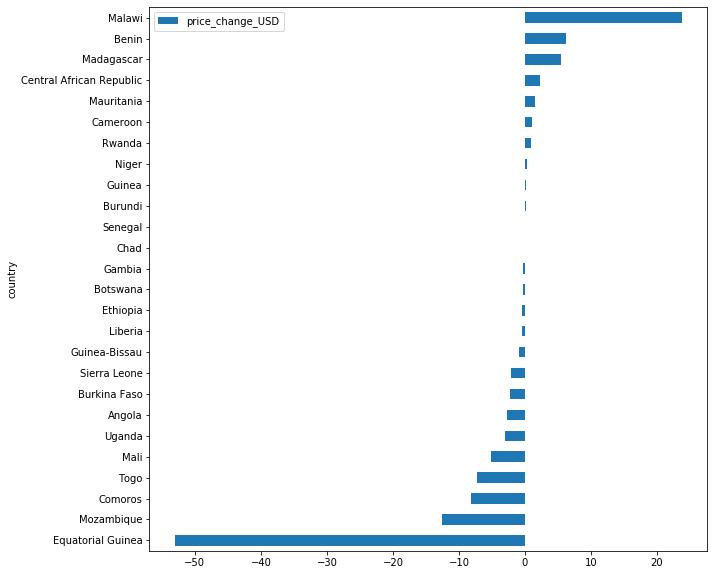

In [173]:
not_affordable_africa.sort_values(by='price_change_USD',ascending = True).plot(kind='barh', y='price_change_USD', x='country', figsize=(10,10))
plt.savefig('charts/drafts/price_change.pdf', transparent = True)
